In [10]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm  # For progress bars
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [11]:
# Set dataset path
DATASET_PATH = "../DATA_PREPARE_ATT_04/Grayscale_Face_images"  # Replace with the root path of your dataset
IMG_SIZE = (260, 260)
BATCH_SIZE = 32

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [12]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
])

In [13]:
# Load datasets with progress bar
def load_datasets():
    print("Loading datasets...")
    with tqdm(total=3, desc="Datasets") as pbar:
        train_dataset = datasets.ImageFolder(root=os.path.join(DATASET_PATH, "train"), transform=transform)
        pbar.update(1)
        val_dataset = datasets.ImageFolder(root=os.path.join(DATASET_PATH, "val"), transform=transform)
        pbar.update(1)
        test_dataset = datasets.ImageFolder(root=os.path.join(DATASET_PATH, "test"), transform=transform)
        pbar.update(1)
    return train_dataset, val_dataset, test_dataset

In [14]:
# DataLoader setup
def create_dataloaders(train_dataset, val_dataset, test_dataset):
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    return train_loader, val_loader, test_loader

In [15]:
# Visualize dataset distribution
def visualize_data_distribution(dataset, title):
    labels = [label for _, label in tqdm(dataset, desc=f"Counting {title} labels")]
    label_counts = Counter(labels)
    emotions = [dataset.classes[i] for i in label_counts.keys()]
    counts = list(label_counts.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(emotions, counts, alpha=0.7)
    plt.title(f"Image Distribution in {title} Set")
    plt.xlabel("Emotion Categories")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=45)
    plt.show()
    
    print(f"Distribution of images in {title} set:")
    for emotion, count in zip(emotions, counts):
        print(f"{emotion}: {count}")

In [16]:
# Visualize example images
def visualize_example_images(dataset, title):
    figure = plt.figure(figsize=(12, 8))
    for i in tqdm(range(12), desc=f"Displaying {title} images"):  # Progress bar for image display
        image, label = dataset[i]
        figure.add_subplot(3, 4, i + 1)
        plt.imshow(image.permute(1, 2, 0))
        plt.title(dataset.classes[label])
        plt.axis("off")
    plt.suptitle(f"Sample Images from {title} Dataset", fontsize=16)
    plt.tight_layout()
    plt.show()


In [17]:
# Iterate through DataLoader with GPU support
def iterate_dataloader(dataloader, title):
    print(f"Iterating through {title} DataLoader on {device}...")
    for batch in tqdm(dataloader, desc=f"Processing {title} batches", total=len(dataloader)):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        pass  # Replace with any processing logic if needed

Loading datasets...


Counting Train labels: 100%|██████████| 90043/90043 [16:04<00:00, 93.33it/s] 


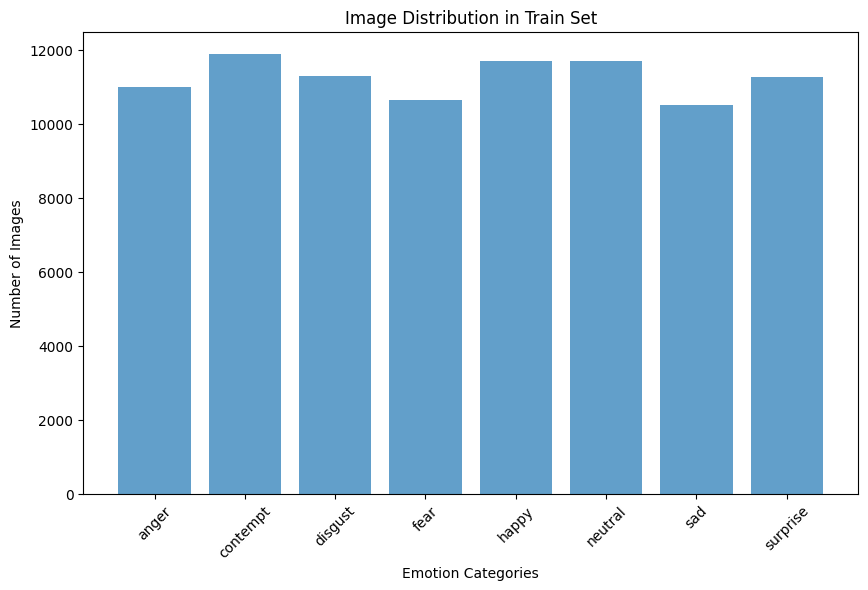

Distribution of images in Train set:
anger: 11011
contempt: 11904
disgust: 11304
fear: 10642
happy: 11700
neutral: 11697
sad: 10509
surprise: 11276


Counting Validation labels: 100%|██████████| 19292/19292 [03:35<00:00, 89.58it/s] 


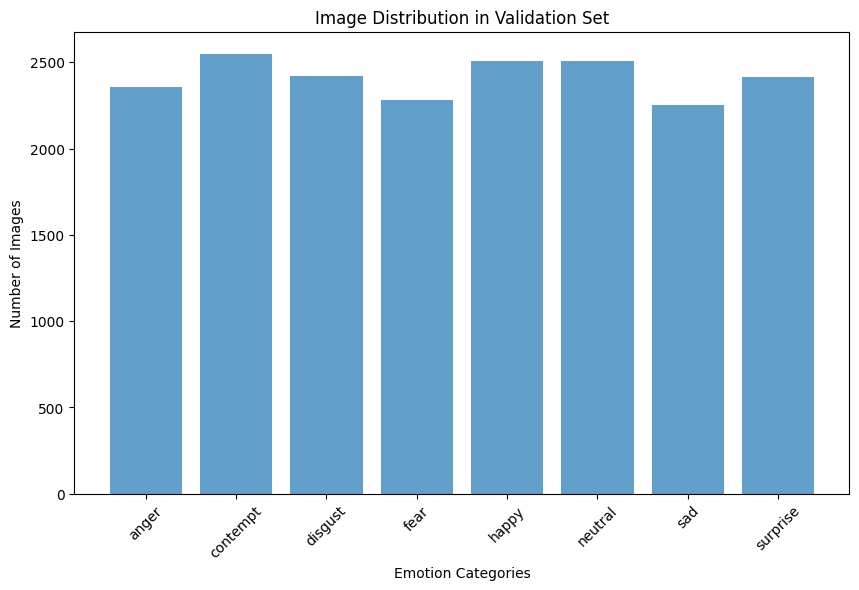

Distribution of images in Validation set:
anger: 2359
contempt: 2550
disgust: 2422
fear: 2280
happy: 2507
neutral: 2506
sad: 2252
surprise: 2416


Counting Test labels: 100%|██████████| 19302/19302 [04:07<00:00, 77.95it/s] 


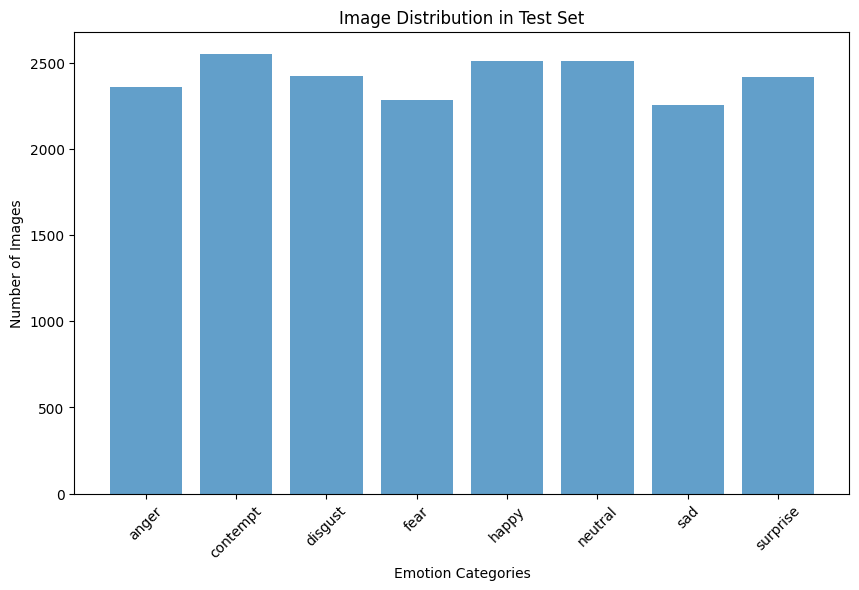

Distribution of images in Test set:
anger: 2361
contempt: 2552
disgust: 2423
fear: 2281
happy: 2508
neutral: 2507
sad: 2253
surprise: 2417


Displaying Train images: 100%|██████████| 12/12 [00:00<00:00, 29.93it/s]


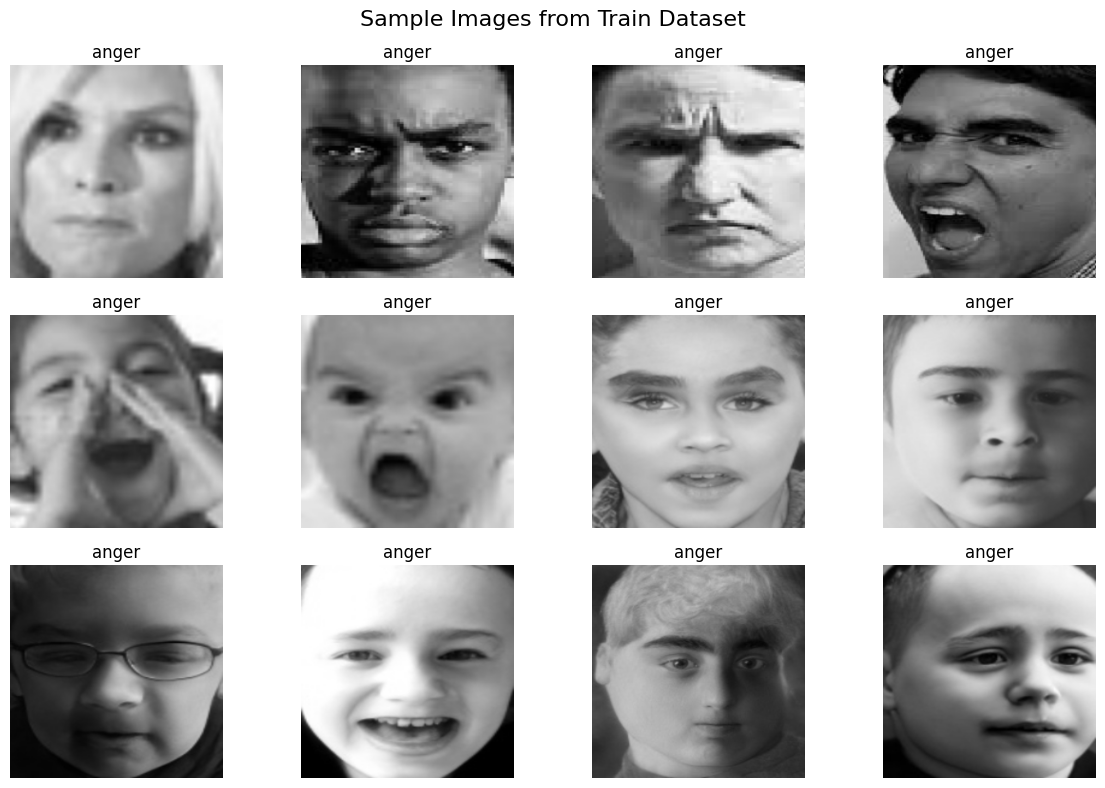

Displaying Validation images: 100%|██████████| 12/12 [00:00<00:00, 44.09it/s]


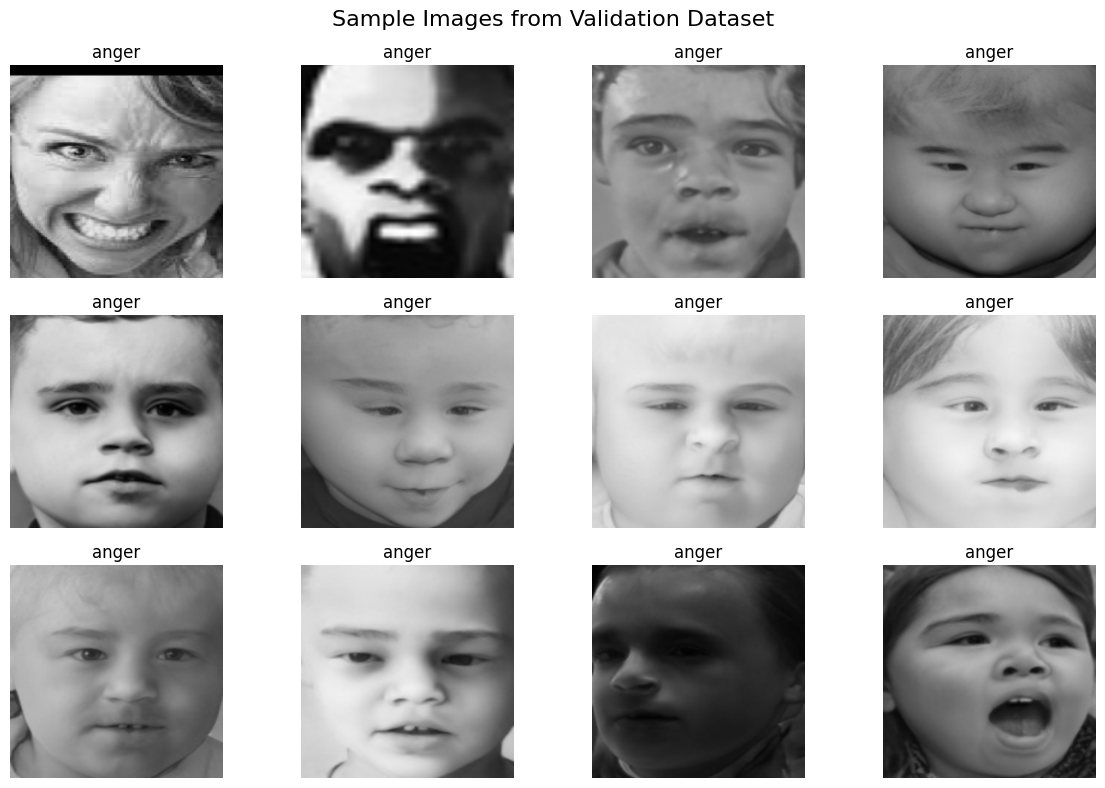

Displaying Test images: 100%|██████████| 12/12 [00:00<00:00, 71.43it/s]


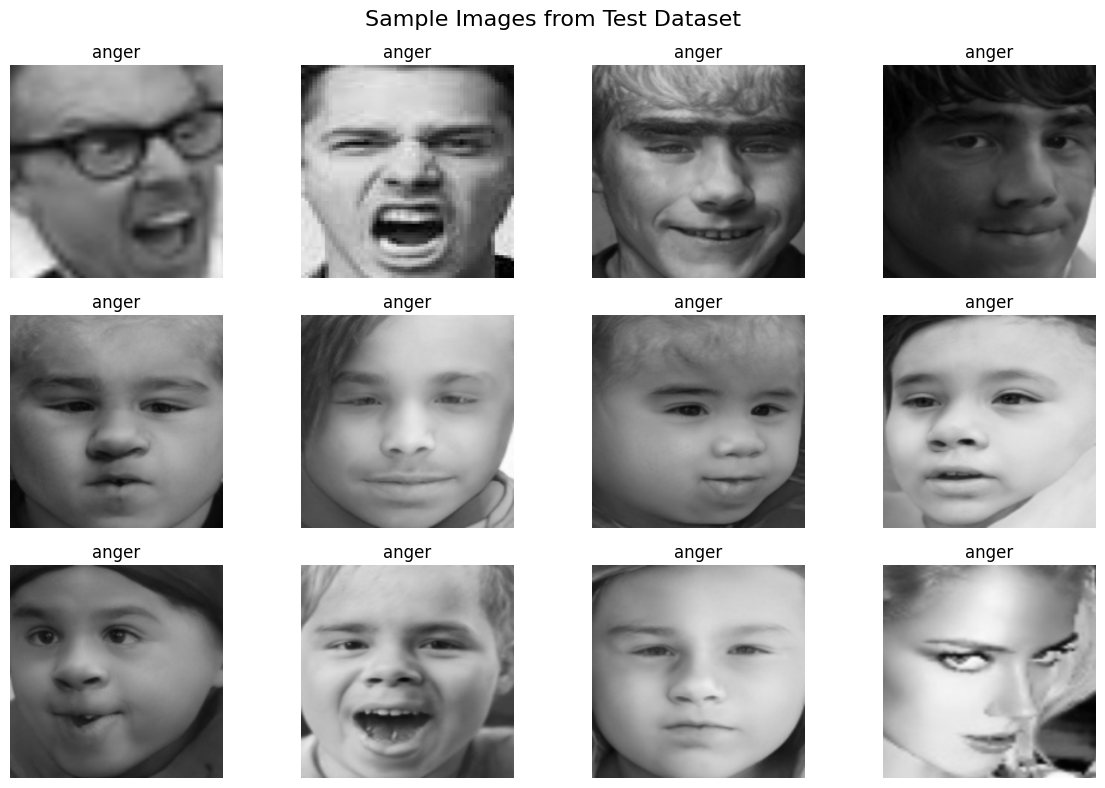

Iterating through Train DataLoader on cuda...


Processing Train batches: 100%|██████████| 2814/2814 [55:18<00:00,  1.18s/it]  


Iterating through Validation DataLoader on cuda...


Processing Validation batches: 100%|██████████| 603/603 [03:41<00:00,  2.72it/s]


Iterating through Test DataLoader on cuda...


Processing Test batches: 100%|██████████| 604/604 [03:53<00:00,  2.59it/s]


In [18]:
# Main function
if __name__ == "__main__":
    # Load datasets
    train_dataset, val_dataset, test_dataset = load_datasets()
    
    # Visualize data distribution
    visualize_data_distribution(train_dataset, "Train")
    visualize_data_distribution(val_dataset, "Validation")
    visualize_data_distribution(test_dataset, "Test")
    
    # Create DataLoaders
    train_loader, val_loader, test_loader = create_dataloaders(train_dataset, val_dataset, test_dataset)
    
    # Visualize example images
    visualize_example_images(train_dataset, "Train")
    visualize_example_images(val_dataset, "Validation")
    visualize_example_images(test_dataset, "Test")
    
    # Iterate through DataLoaders
    iterate_dataloader(train_loader, "Train")
    iterate_dataloader(val_loader, "Validation")
    iterate_dataloader(test_loader, "Test")